In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# скачиваем основной датасет с апельсиновыми деревьями
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CQL5rwm3Xg5OTOzuPH8L")
project = rf.workspace("1-xjgvf").project("orange-8ywhf")
version = project.version(5)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Orange-5 in yolov8:: 100%|██████████| 10810/10810 [00:19<00:00, 563.31it/s] 


In [ ]:
import yaml

def read_and_print_yaml(file_path):
    # Открываем файл и читаем его содержимое
    with open(file_path, 'r') as file:
        data = yaml.safe_load(file)

    # Выводим содержимое файла в нужном формате
    print(f"train: {data['train']}")
    print(f"val: {data['val']}")
    print(f"test: {data['test']}\n")
    print(f"nc: {data['nc']}")
    print(f"names: {data['names']}\n")
    print("roboflow:")
    for key, value in data['roboflow'].items():
        print(f"  {key}: {value}")


In [ ]:
read_and_print_yaml('/content/Orange-5/data.yaml')

train: Orange-5/train/images
val: Orange-5/valid/images
test: ../test/images

nc: 1
names: ['orange']

roboflow:
  license: CC BY 4.0
  project: orange-8ywhf
  url: https://universe.roboflow.com/1-xjgvf/orange-8ywhf/dataset/5
  version: 5
  workspace: 1-xjgvf


In [ ]:
# меняем пути к изображениям на актуальные (необходимо для запуска модели на датасете)
with open('/content/Orange-5/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Modify the data
data['train'] = '../train/images'
data['val'] = '../valid/images'

# Save the modified data back to the YAML file
with open('/content/Orange-5/data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

In [ ]:
# проверяем
read_and_print_yaml('/content/Orange-5/data.yaml')

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['orange']

roboflow:
  license: CC BY 4.0
  project: orange-8ywhf
  url: https://universe.roboflow.com/1-xjgvf/orange-8ywhf/dataset/5
  version: 5
  workspace: 1-xjgvf


In [ ]:
# скачиваем кадры из целевого фильма
#https://drive.google.com/file/d/1ZZTc9RWx31ebvRD3AfdxOioNMZnSKiwv/view?usp=drive_link

!pip install -q gdown==4.7.3
!gdown --quiet 1ZZTc9RWx31ebvRD3AfdxOioNMZnSKiwv -O image_paths_films.zip
!unzip -q "image_paths_films.zip"


In [ ]:
!pip install -q gdown==4.7.3
!gdown --quiet 15QfuVYGwqoPHy0ldiYxb9H3HPjg3AvPs -O man_orange_farm3--online-audio-convert.com.mp4

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

import supervision as sv
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# необходим для правильного отображения изображений в колабе
from google.colab.patches import cv2_imshow

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/78.2 GB disk)


In [ ]:
# скачиваем предобученную модель чуть больше слабейшей
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 260MB/s]


In [ ]:
# берем кадры из нашего целевого видео
image_paths_films = [
    '/content/image_paths_films/frame10020000.jpg',
    '/content/image_paths_films/frame20040000.jpg',
    '/content/image_paths_films/frame30000000.jpg',
    '/content/image_paths_films/frame4020000.jpg'
]

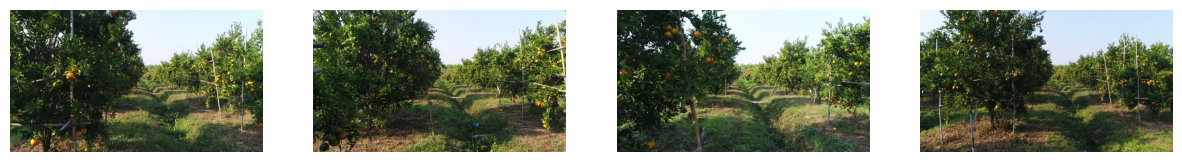

In [ ]:
# Создаем subplot с тремя изображениями в одной строке
plt.figure(figsize=(15, 5))

for i, image_path in enumerate(image_paths_films, start=1):
    plt.subplot(1, 4, i)  # 1 строка, 3 столбца, i-тое изображение
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')  # Отключаем оси для чистого отображения

plt.show()

In [ ]:
# проверяем, как предсказывает предобученная модель без дообучения на кадрах из нашего целевого видео
for img_in in image_paths_films:
  results = model.predict(img_in)
  result = results[0]
  detections = sv.Detections.from_ultralytics(result)

  bounding_box_annotator = sv.BoundingBoxAnnotator()
  label_annotator = sv.LabelAnnotator()

  labels = [
    model.model.names[class_id]
    for class_id
    in detections.class_id
  ]

  image = cv2.imread(img_in)

  annotated_image = bounding_box_annotator.annotate(
     scene=image, detections=detections)
  annotated_image = label_annotator.annotate(
     scene=annotated_image, detections=detections, labels=labels)

  sv.plot_image(annotated_image)
  for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    if class_id == 'orange' :
      cords = box.xyxy[0].tolist()
      cords = [round(x) for x in cords]
      conf = round(box.conf[0].item(), 2)
      print("Object type:", class_id)
      print("Coordinates:", cords)
      print("Probability:", conf)
      print("---")


Output hidden; open in https://colab.research.google.com to view.

<font color=green size=3>
Видим, что прямо из коробки уже есть результат.
<br>  
Распознаем предобученной моделью нашеме целевое видео.

</font>

In [ ]:
results_play = model.predict(source='/content/man_orange_farm3--online-audio-convert.com.mp4', save=True)
#!cp runs /content/drive/MyDrive/data/itog_train_1/runs



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/614) /content/man_orange_farm3--online-audio-convert.com.mp4: 384x640 1 orange, 36.7ms
video 1/1 (frame 2/614) /content/man_orange_farm3--online-audio-convert.com.mp4: 384x640 1 orange, 51.9ms
video 1/1 (frame 3/614) /content/man_orange_farm3--online-audio-convert.com.mp4: 384x640 (no detections), 33.9ms
video 1/1 (frame 4/614) /content/man_orange_farm3--online-audio-convert.com.mp4: 384x640 (no detections), 35.3ms
video 1/1 (frame 5

<font color=green size=3>
Сделали предсказания в целом на полном фильме.
<br>  
Результат не отличается от предыдущего, полученного на отдельных кадрах.
<br>
<a href=https://drive.google.com/file/d/1YIUjQSx0PbboG9QkPOSfs7LbMkfJmy74/view?usp=sharing>сад_предсказан_без_дообучения.avi</a>
<br>  
Попробуем его улучшить через обучение на размеченном датасете, наиболее близком по характеру изображений к нашему целевому видео.
</font>

<font color=green size=3>
Теперь повторим предсказания с лучшими весами, полученными после нашего дообучения на первом основном датасете.
<br>  
</font>

In [ ]:
    # Скачиваем наиболее удачные веса для YOLOv8 модели после обучения на первом основном датасете
    yolo_model_best = YOLO('/content/ves/best.pt')


In [ ]:
# проверяем, как предсказывает модель на кадрах из нашего целевого видео
for img_in in image_paths_films:
  results = yolo_model_best.predict(img_in)
  result = results[0]
  detections = sv.Detections.from_ultralytics(result)

  bounding_box_annotator = sv.BoundingBoxAnnotator()
  label_annotator = sv.LabelAnnotator()

  labels = [
    yolo_model_best.model.names[class_id]
    for class_id
    in detections.class_id
  ]

  image = cv2.imread(img_in)

  annotated_image = bounding_box_annotator.annotate(
     scene=image, detections=detections)
  annotated_image = label_annotator.annotate(
     scene=annotated_image, detections=detections, labels=labels)

  sv.plot_image(annotated_image)
  for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    if class_id == 'orange' :
      cords = box.xyxy[0].tolist()
      cords = [round(x) for x in cords]
      conf = round(box.conf[0].item(), 2)
      print("Object type:", class_id)
      print("Coordinates:", cords)
      print("Probability:", conf)
      print("---")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
results_play_best = yolo_model_best.predict(source='/content/man_orange_farm3--online-audio-convert.com.mp4', save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/614) /content/man_orange_farm3--online-audio-convert.com.mp4: 384x640 10 oranges, 25.2ms
video 1/1 (frame 2/614) /content/man_orange_farm3--online-audio-convert.com.mp4: 384x640 10 oranges, 25.1ms
video 1/1 (frame 3/614) /content/man_orange_farm3--online-audio-convert.com.mp4: 384x640 9 oranges, 25.2ms
video 1/1 (frame 4/614) /content/man_orange_farm3--online-audio-convert.com.mp4: 384x640 5 oranges, 25.3ms
video 1/1 (frame 5/614) /c

<font color=green size=3>
После дообучения на датасете близком по характеру изображений к нашему целевому фильму, результаты предсказаний заметно улучшились.
<br>  
Не стало ложных предсказаний из других классов.
<br>
Колличество распознанных апельсинов увеличилось и увеличилась уверенность в предсказаниях.
<br>
<a href=https://drive.google.com/file/d/1XMlx2VvGdkG1uvvjbMTncqd7hwixg0VZ/view?usp=drive_link>сад_предсказан_после_дообучения.avi</a>
<br>
Нейросети еще далеко до приличного результата. Удалось обучиться только на 25 эпохах на бесплатном аккаунте.
<br>
Графики показывают, что обучение продолжается, и  потенциал улучшения метрик при дополнительном обучении еще не исчерпан.
<br>
Попробую дообучить нейросеть на датасет другого характера - втором "искуственном" датасете с экземплярами апельсина "внедренными" в различные изображения из разных тем с использованием различных аугментаций. Посмотрю, как изменятся метрики и результаты предсказания на кадрах из целевого филма про реальный сад.
<br>
<br>

</font>

In [ ]:
yolo_model_best2 = YOLO('/content/ves/best2.pt')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# скачиваем кадры из целевого фильма
#https://drive.google.com/file/d/1ZZTc9RWx31ebvRD3AfdxOioNMZnSKiwv/view?usp=drive_link

!pip install -q gdown==4.7.3
!gdown --quiet 1ZZTc9RWx31ebvRD3AfdxOioNMZnSKiwv -O image_paths_films.zip
!unzip -q "image_paths_films.zip"


replace image_paths_films/frame4020000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace image_paths_films/frame30000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace image_paths_films/frame30000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace image_paths_films/frame30000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace image_paths_films/frame30000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace image_paths_films/frame30000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace image_paths_films/frame30000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace image_paths_films/frame30000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace image_paths_films/frame30000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
repl

In [ ]:
# скачиваем датасет с просто апельсинами на разном фоне
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CQL5rwm3Xg5OTOzuPH8L")
project = rf.workspace("mikeylamb").project("oranges-93gop")
version = project.version(1)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.41, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Oranges-1 in yolov8:: 100%|██████████| 2268/2268 [00:01<00:00, 2115.57it/s]


In [ ]:
read_and_print_yaml('/content/Oranges-1/data.yaml')

train: Oranges-1/train/images
val: Oranges-1/valid/images
test: ../test/images

nc: 4
names: ['2', 'banana', 'orange', 'oranges']

roboflow:
  license: CC BY 4.0
  project: oranges-93gop
  url: https://universe.roboflow.com/mikeylamb/oranges-93gop/dataset/1
  version: 1
  workspace: mikeylamb


In [ ]:
# меняем пути к изображениям на актуальные (необходимо для запуска модели на датасете)
with open('/content/Oranges-1/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Modify the data
data['train'] = '../train/images'
data['val'] = '../valid/images'

# Save the modified data back to the YAML file
with open('/content/Oranges-1/data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

In [ ]:
# проверяем
read_and_print_yaml('/content/Oranges-1/data.yaml')

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 4
names: ['2', 'banana', 'orange', 'oranges']

roboflow:
  license: CC BY 4.0
  project: oranges-93gop
  url: https://universe.roboflow.com/mikeylamb/oranges-93gop/dataset/1
  version: 1
  workspace: mikeylamb


In [ ]:
# проверяем, как предсказывает модель на кадрах из нашего целевого видео
for img_in in image_paths_films:
  results = yolo_model_best2.predict(img_in)
  result = results[0]
  detections = sv.Detections.from_ultralytics(result)

  bounding_box_annotator = sv.BoundingBoxAnnotator()
  label_annotator = sv.LabelAnnotator()

  labels = [
    yolo_model_best2.model.names[class_id]
    for class_id
    in detections.class_id
  ]

  image = cv2.imread(img_in)

  annotated_image = bounding_box_annotator.annotate(
     scene=image, detections=detections)
  annotated_image = label_annotator.annotate(
     scene=annotated_image, detections=detections, labels=labels)

  sv.plot_image(annotated_image)
  for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    if class_id == 'orange' :
      cords = box.xyxy[0].tolist()
      cords = [round(x) for x in cords]
      conf = round(box.conf[0].item(), 2)
      print("Object type:", class_id)
      print("Coordinates:", cords)
      print("Probability:", conf)
      print("---")


Output hidden; open in https://colab.research.google.com to view.

<font color=green size=3>
Ничего не предсказалось.
<br>
Попробую распознать все кадры непосредственно в видеоролике.

</font>

In [ ]:
results_play_best2 = yolo_model_best2.predict(source='/content/man_orange_farm3--online-audio-convert.com.mp4', save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/614) /content/man_orange_farm3--online-audio-convert.com.mp4: 384x640 (no detections), 26.2ms
video 1/1 (frame 2/614) /content/man_orange_farm3--online-audio-convert.com.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 3/614) /content/man_orange_farm3--online-audio-convert.com.mp4: 384x640 (no detections), 49.0ms
video 1/1 (frame 4/614) /content/man_orange_farm3--online-audio-convert.com.mp4: 384x640 (no detections), 34.1ms
vide

<font color=green size=3>
Ничего не предсказалось, как и в прошлый раз.
<br>
Попробую проверить распознавание по изображения из датасета, на котором модель обучалась.

</font>

In [ ]:
# смотрим на изображения и аннотацию в датасете
# Пути к изображениям

image_paths2 = [
    '/content/Oranges-1/valid/images/106_jpg.rf.d56750dcb843a8253afc5d5127a9c4ca.jpg',
    '/content/Oranges-1/valid/images/144_jpg.rf.7e5d95f5b085cc0ca0e52ea34041ef76.jpg',
    '/content/Oranges-1/valid/images/fresh-331-_png.rf.f4c406ff64584636af5397b51408bcca.jpg',
    '/content/Oranges-1/valid/images/fresh-95-_png.rf.a41dd48ed3df2452464213579488f053.jpg'
]


In [ ]:
# проверяем, как предсказывает модель после дообучения на кадрах из нашего целевого видео
for img_in in image_paths2:
  results = yolo_model_best2.predict(img_in)
  result = results[0]
  detections = sv.Detections.from_ultralytics(result)

  bounding_box_annotator = sv.BoundingBoxAnnotator()
  label_annotator = sv.LabelAnnotator()

  labels = [
    yolo_model_best2.model.names[class_id]
    for class_id
    in detections.class_id
  ]

  image = cv2.imread(img_in)

  annotated_image = bounding_box_annotator.annotate(
     scene=image, detections=detections)
  annotated_image = label_annotator.annotate(
     scene=annotated_image, detections=detections, labels=labels)

  sv.plot_image(annotated_image)
  for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    if class_id == 'orange' :
      cords = box.xyxy[0].tolist()
      cords = [round(x) for x in cords]
      conf = round(box.conf[0].item(), 2)
      print("Object type:", class_id)
      print("Coordinates:", cords)
      print("Probability:", conf)
      print("---")


Output hidden; open in https://colab.research.google.com to view.

<font color=green size=3>
На "родном" датасете детекция проходит нормально, как и положено.
<br>
Видимо маленькие, круглые, оранжевые в саду - это не апельсины. Апельсины это на столе.

</font>